In [12]:
import pandas as pd


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
pollution_data = pd.read_csv("datasets/pollution_data.csv")
pollution_data

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [3]:
multivar_pollution_data = pollution_data.drop(columns=['date', 'wnd_dir'])
multivar_pollution_data

,pollution,dew,temp,press,wnd_spd,snow,rain
0,129.0,-16,-4.0,1020.0,1.79,0,0
1,148.0,-15,-4.0,1020.0,2.68,0,0
2,159.0,-11,-5.0,1021.0,3.57,0,0
3,181.0,-7,-5.0,1022.0,5.36,1,0
4,138.0,-7,-5.0,1022.0,6.25,2,0
...,...,...,...,...,...,...,...
43795,8.0,-23,-2.0,1034.0,231.97,0,0
43796,10.0,-22,-3.0,1034.0,237.78,0,0
43797,10.0,-22,-3.0,1034.0,242.70,0,0
43798,8.0,-22,-4.0,1034.0,246.72,0,0


In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(multivar_pollution_data)

Using the scree plot generated below, we can obvserve that ~85% of the variance in our multivariate pollution data equation can be explained by 4 components. So we will do a PCA to reduce dimensionality and confirm this analysis. 

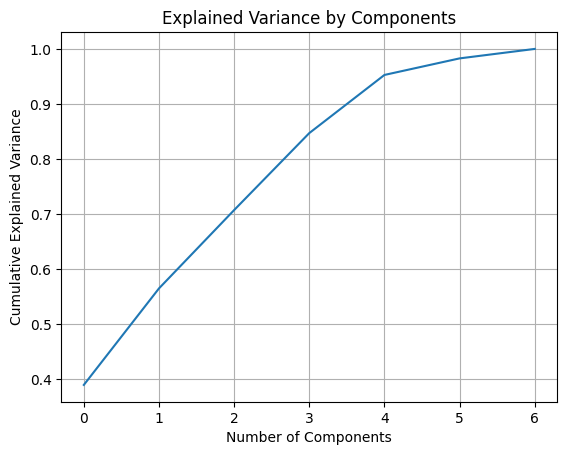

In [6]:
pca = PCA().fit(data_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

c:\Users\justi\Desktop\SeriesProject\myenv\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


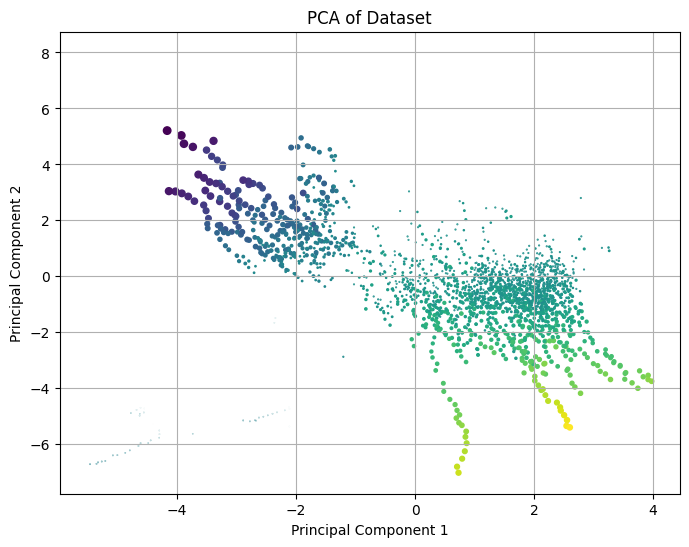

In [28]:
pca = PCA(n_components=7)

principal_components = pca.fit_transform(data_scaled)

principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7'])


plt.figure(figsize=(8,6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], principal_df['Principal Component 3'], principal_df['Principal Component 4'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

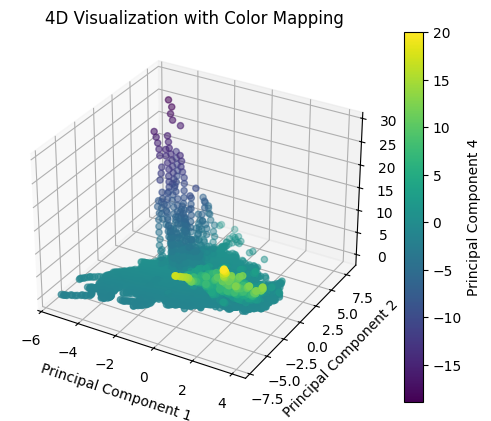

In [14]:

pca = PCA(n_components=4)
principal_components = pca.fit_transform(data_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Choose the fourth principal component as the color
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=principal_components[:, 3], cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, ax=ax, label='Principal Component 4')

plt.title('4D Visualization with Color Mapping')
plt.show()


In [29]:
print("Explained variance by each component: ", pca.explained_variance_ratio_)


Explained variance by each component:  [0.38954825 0.17534459 0.14231179 0.13986608 0.10564038 0.03008845
 0.01720047]


In [30]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [32]:
principal_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7
0,-1.530721,0.818124,-0.166347,0.314273,-0.252916,-0.769730,-0.189643
1,-1.482328,0.964109,-0.161515,0.330649,-0.103612,-0.733708,-0.191773
2,-1.421339,1.081351,-0.139545,0.352388,-0.002433,-0.509049,-0.360470
3,-1.397459,1.436318,0.962213,-0.339049,0.093700,-0.299267,-0.397797
4,-1.517227,1.255606,2.045535,-1.103110,-0.281134,-0.308794,-0.433978
...,...,...,...,...,...,...,...
43795,-3.548365,-2.736400,-0.109027,-0.589603,2.210040,0.395988,0.063306
43796,-3.578644,-2.767319,-0.098726,-0.600438,2.317056,0.430494,-0.040378
43797,-3.599951,-2.824169,-0.096735,-0.619456,2.391486,0.437640,-0.045998
43798,-3.664454,-2.869662,-0.091655,-0.625865,2.438118,0.429131,-0.117485


In [33]:
data_scaled

array([[ 0.37925225, -1.23558917, -1.34984913, ..., -0.44189031,
        -0.06937208, -0.13770552],
       [ 0.58521158, -1.16628508, -1.34984913, ..., -0.4240982 ,
        -0.06937208, -0.13770552],
       [ 0.70445119, -0.8890687 , -1.43186175, ..., -0.40630608,
        -0.06937208, -0.13770552],
       ...,
       [-0.91070355, -1.65141375, -1.26783651, ...,  4.3741754 ,
        -0.06937208, -0.13770552],
       [-0.93238347, -1.65141375, -1.34984913, ...,  4.45453979,
        -0.06937208, -0.13770552],
       [-0.88902362, -1.58210965, -1.26783651, ...,  4.51711206,
        -0.06937208, -0.13770552]])

In [20]:
principal_df.to_csv('pollution_pca.csv', index=False)


In [26]:
principal_components[:, 1]

array([ 0.81812354,  0.96410928,  1.0813507 , ..., -2.82416887,
       -2.86966247, -2.8876636 ])

In [27]:
correlation_matrix = np.corrcoef(principal_components[:, 1], data_scaled[:, 0])
correlation_matrix

array([[1.        , 0.82453058],
       [0.82453058, 1.        ]])

In [22]:
principal_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,-1.530721,0.818124,-0.166347,0.314273
1,-1.482328,0.964109,-0.161515,0.330649
2,-1.421339,1.081351,-0.139545,0.352388
3,-1.397459,1.436318,0.962213,-0.339049
4,-1.517227,1.255606,2.045535,-1.103110
...,...,...,...,...
43795,-3.548365,-2.736400,-0.109027,-0.589603
43796,-3.578644,-2.767319,-0.098726,-0.600438
43797,-3.599951,-2.824169,-0.096735,-0.619456
43798,-3.664454,-2.869662,-0.091655,-0.625865


Ultimately, I decided it's not wise to do a PCA on this particular problem as applying PCA to the dataset would make it very difficult to interpret the model's results. 